In [45]:
import pandas as pd
from bs4  import BeautifulSoup
import numpy as np
import plotly.express as px
import seaborn as sns


# Restaurants

In [46]:
resto_soup = pd.read_csv('restaurant_soup').drop(columns='Unnamed: 0').squeeze()
resto_soup2 = pd.read_csv('restaurant_soup2.csv').drop(columns='Unnamed: 0').squeeze()

In [47]:
resto_soup2.index

Index(['Cerveseria Catalana', 'My Fucking Restaurant', 'Ciutat Comtal',
       'Tapeo', 'Arume', 'Taquerías Tamarindo', 'Vinitus', 'Somorrostro',
       'Cañete', 'Firebug',
       ...
       'Chez Cocó', 'Portolés', 'Bo de Gracia', 'Margherita', 'Bar Nolla',
       'Casa Dorita', 'Palmito Beach Bar', 'Takumi Sapporo Ramen Kitchen',
       'Bosque Palermo', 'Son Hao'],
      dtype='object', length=207)

In [48]:
resto_soup.index


Index(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200', '210',
       '220', '230'],
      dtype='object')

#### Name

In [73]:
# restaurant name
name = []
for row in resto_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        name.append(tag.text)

In [74]:
# It's like there are duplicates
pd.Series(name).value_counts()

La Paradeta             5
Estimar                 2
Macchina                2
Cremat 11               2
Solomillo               2
                       ..
Zarautz                 1
Elisabets               1
La Cuina de Laietana    1
Somorrostro             1
Abirradero              1
Length: 207, dtype: int64

#### Price range

In [51]:
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)


#### Rating

In [53]:
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)
        

In [54]:
# # test
# for n, rat in zip(name, rating):
#     print(n, rat) 

Cerveseria Catalana 4.5
My Fucking Restaurant 4.5
Ciutat Comtal 4
Tapeo 4.5
Arume 4.5
Taquerías Tamarindo 4.5
Vinitus 4.5
Somorrostro 4.5
Cañete 4.5
Firebug 4.5
El Nacional 4
Firebug 4.5
Tucco Real Food Born 4.5
Disfrutar 5
Tosca 4.5
Brunch & Cake 4
Can Paixano 4.5
El Pintxo de Petritxol 4.5
Boa-Bao 4.5
El Asador de Aranda 4.5
El Asador de Aranda 4.5
Restaurant La Tasqueta de Blai 4.5
Telefèric 4
Arcano 4.5
Tickets 4.5
El Jardín del Edén 4.5
Cera 23 4.5
A Tu Bola 4.5
Guell 4.5
Bar Mut 4.5
Buenos Aires 4.5
Le Romane 5
La Pepita 4.5
Bar Mut 4.5
Cachitos 4
2254 4.5
Federal 4.5
A Tu Bola 4.5
Lizarran 4
Momo 4.5
Paradiso 4.5
Sensi 4.5
Alsur Café 4
2254 4.5
Maitea 4.5
Federal 4.5
Betlem 4.5
Llamber 4.5
Micu Maku 4.5
O’Toxo 3 Hermanos 4.5
Bilbao Berria 4
La Cuina de Laietana 4.5
Macchina 4.5
Bo de Boqueria 5
Caravelle 4.5
La Bodegueta 4
Raó 4.5
Terrace la Isabela 4.5
El Vaso de Oro 4.5
9 Nine 5
Paco Alcalde 4.5
Xian 4.5
Casa Alfonso 4
La Caravana 5
Mosquito 4
Nubar 4.5
Quimet & Quimet 4.5
La 

#### Reviews

In [55]:
reviews = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rev = header_text.select_one('.reviewCount__09f24__tnBk4')
        
        if rev is not None:
            
            reviews.append(rev.text)


        else:
            reviews.append(np.nan)
        
#test
for n, rev in zip(name, reviews):
    print(n, rev) 

Cerveseria Catalana 1279
My Fucking Restaurant 89
Ciutat Comtal 1120
Tapeo 451
Arume 633
Taquerías Tamarindo 208
Vinitus 304
Somorrostro 368
Cañete 392
Firebug 125
El Nacional 330
Firebug 125
Tucco Real Food Born 618
Disfrutar 110
Tosca 240
Brunch & Cake 852
Can Paixano 378
El Pintxo de Petritxol 109
Boa-Bao 6
El Asador de Aranda 28
El Asador de Aranda 28
Restaurant La Tasqueta de Blai 230
Telefèric 178
Arcano 292
Tickets 195
El Jardín del Edén 16
Cera 23 555
A Tu Bola 79
Guell 64
Bar Mut 149
Buenos Aires 55
Le Romane 12
La Pepita 514
Bar Mut 149
Cachitos 98
2254 62
Federal 55
A Tu Bola 79
Lizarran 52
Momo 23
Paradiso 105
Sensi 377
Alsur Café 325
2254 62
Maitea 128
Federal 55
Betlem 61
Llamber 133
Micu Maku 13
O’Toxo 3 Hermanos 92
Bilbao Berria 152
La Cuina de Laietana 23
Macchina 32
Bo de Boqueria 15
Caravelle 223
La Bodegueta 36
Raó 32
Terrace la Isabela 2
El Vaso de Oro 178
9 Nine 45
Paco Alcalde 41
Xian 11
Casa Alfonso 108
La Caravana 15
Mosquito 144
Nubar 4
Quimet & Quimet 454
La 

#### Location

In [56]:
resto_soup2.shape

(207,)

In [57]:

location = [] 
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '::'.join(adress_elements) )


In [58]:
location_resto_df = pd.DataFrame({'name': resto_soup2.index, 'location': location})

In [59]:
location_resto_df.location.str.split('::').apply(lambda x: len(x)).value_counts()

3    192
1     10
4      4
5      1
Name: location, dtype: int64

In [60]:
location_resto_df['street'] = location_resto_df.location.str.split('::').apply(lambda x: x[0])
location_resto_df['postal_code'] = location_resto_df.location.str.split('::').apply(lambda x: x[1] if len(x) == 3 else np.nan)

#### Website

In [62]:
website = []
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)


In [ ]:
website

#### Number of photos

In [61]:

nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:

        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)

    else:
        nb_photos.append(np.nan)
    

In [75]:
photo_resto_df = pd.DataFrame({'name': resto_soup2.index, 'nb_photos': nb_photos})
# df numbers of pho
# for name, photo in zip(resto_soup2.index, nb_photos):
#     print(name, photo)

#### Opening hours

In [ ]:
opening_hours = {'name':list(), 'day':list(), 'opening':list(), 'closing':list()}
for row, name in zip(resto_soup2, resto_soup2.index):
    soup = BeautifulSoup(row, 'html.parser')
    days = []
    days_container = soup.select('.day-of-the-week__09f24__JJea_')
    time_container = soup.select('.no-wrap__09f24__c3plq.css-1p9ibgf')
    for day, time in zip(days_container, time_container):

        opening_hours['name'].append(name)
        opening_hours['day'].append(day.text)
        opening_hours['opening'].append(   pd.Series(time.text).str.extract(r'(\d+:\d+ \w+) - \d+:\d+ \w+').squeeze()   )
        opening_hours['closing'].append( pd.Series(time.text).str.extract(r'\d+:\d+ \w+ - (\d+:\d+ \w+)').squeeze() )

In [ ]:
# Some restaurants open twice a day...it was hard to get the second time
# Things to based analysis (numbers of openings hours day on average, do they open on the weekend.)
opening_hours_df = pd.DataFrame(opening_hours)

for i in range(len(opening_hours_df)):
    print( list(opening_hours_df.iloc[i, :]) ) 



#### Amenities

#### Restaurant dataset

In [76]:
resto_df = pd.DataFrame({'name':name, 'rating':rating, 'reviews': reviews, 'price_range': price_range})

In [77]:
resto_df = pd.merge(resto_df, location_resto_df, 'left')

In [78]:
resto_df =  pd.merge(resto_df, photo_resto_df, 'left')

In [79]:
resto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         240 non-null    object
 1   rating       240 non-null    object
 2   reviews      240 non-null    object
 3   price_range  200 non-null    object
 4   location     240 non-null    object
 5   street       240 non-null    object
 6   postal_code  222 non-null    object
 7   nb_photos    228 non-null    object
dtypes: object(8)
memory usage: 16.9+ KB


In [80]:
# Missing values 
resto_df.isnull().sum().sort_values(ascending=False)

price_range    40
postal_code    18
nb_photos      12
street          0
location        0
reviews         0
rating          0
name            0
dtype: int64

In [81]:
# duplicates values
resto_df[resto_df.duplicated()]

,name,rating,reviews,price_range,location,street,postal_code,nb_photos
11,Firebug,4.5,125,€€,"Passeig de Sant Joan, 23::08010 Barcelona::Spain","Passeig de Sant Joan, 23",08010 Barcelona,258
20,El Asador de Aranda,4.5,28,€€€,"Calle Pau Claris, 70::08010 Barcelona::Spain","Calle Pau Claris, 70",08010 Barcelona,105
33,Bar Mut,4.5,149,€€€,"Carrer de Pau Claris, 192::08037 Barcelona::Spain","Carrer de Pau Claris, 192",08037 Barcelona,294
37,A Tu Bola,4.5,79,€,Carrer Hospital 78::08001 Barcelona::Spain,Carrer Hospital 78,08001 Barcelona,132
43,2254,4.5,62,€€€,"Consell de Cent, 335::08007 Barcelona::Spain","Consell de Cent, 335",08007 Barcelona,99
45,Federal,4.5,55,€,"Passatge de la Pau, 11::08002 Barcelona::Spain","Passatge de la Pau, 11",08002 Barcelona,136
81,Eat My Trip,4.5,73,€€,"Carrer del Consell de Cent, 378::08009 Barcelo...","Carrer del Consell de Cent, 378",08009 Barcelona,193
83,Billy Brunch,5,42,NaN,"Carrer de Bailèn, 115::08009 Barcelona::Spain","Carrer de Bailèn, 115",08009 Barcelona,104
96,La Paradeta,4.5,44,€€€,"Passatge de Simó, 18::08025 Barcelona::Spain","Passatge de Simó, 18",08025 Barcelona,534
101,Doña Rosa,4.5,2,NaN,,,NaN,NaN


In [82]:
resto_df.drop_duplicates(inplace=True)

#### Cleaning

In [83]:
# Price range (price per person)
# Based on information from yelp and Quora:
# $= under $10. $$=11-30. $$$=31-60. $$$$= over $61
# Converting to EUR

# 1 EUR = 1.11234 USD
Euro = (pd.Series([10, 11, 30, 31, 60, 61]) * 1.11234).apply(lambda x: int(x))

mapper = {'€':'under 11', "€€":'[12 - 33]', '€€€':'[34 - 66]', '€€€€':'over 67'}

resto_df['price_range'] = resto_df['price_range'].map(mapper)

In [84]:
# Rating and number of reviews
resto_df['rating'] = resto_df['rating'].apply(lambda x: float(x)) 
resto_df['reviews'] = resto_df['reviews'].apply(lambda x: float(x))

resto_df.describe()

,rating,reviews
count,211.000000,211.000000
mean,4.457346,98.781991
std,0.297738,166.929925
min,4.000000,1.000000
25%,4.500000,15.000000
50%,4.500000,42.000000
75%,4.500000,108.500000
max,5.000000,1279.000000


In [85]:
# get coordinates from addresses
pd.DataFrame(resto_df.street + ' ' + resto_df.postal_code).to_csv('resto_addresses.csv', index=False)

resto_df.shape

(211, 8)

In [ ]:
# after using an addon on google sheet
coordinates = pd.read_csv('resto_coordinates.csv')[['Latitude', 'Longitude']]
coordinates.shape

In [86]:
# index inconsistent because of dropping duplicates
resto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 239
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         211 non-null    object 
 1   rating       211 non-null    float64
 2   reviews      211 non-null    float64
 3   price_range  176 non-null    object 
 4   location     211 non-null    object 
 5   street       211 non-null    object 
 6   postal_code  196 non-null    object 
 7   nb_photos    201 non-null    object 
dtypes: float64(2), object(6)
memory usage: 14.8+ KB


In [87]:
# because of dropping duplicates need to reset the index
resto_df = pd.concat([resto_df.reset_index(drop=True), coordinates], axis = 1)

In [88]:
resto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         211 non-null    object 
 1   rating       211 non-null    float64
 2   reviews      211 non-null    float64
 3   price_range  176 non-null    object 
 4   location     211 non-null    object 
 5   street       211 non-null    object 
 6   postal_code  196 non-null    object 
 7   nb_photos    201 non-null    object 
 8   Latitude     196 non-null    float64
 9   Longitude    196 non-null    float64
dtypes: float64(4), object(6)
memory usage: 16.6+ KB


In [89]:
resto_df.to_csv('resto_dataset.csv', index=False)

# Hotels

In [90]:
hotel_soup = pd.read_csv('hotel_soup.csv').drop(columns='Unnamed: 0').squeeze()
hotel_soup2 = pd.read_csv('hotel_soup2.csv').drop(columns='Unnamed: 0').squeeze()
print(hotel_soup2.index)
print(hotel_soup.index)

Index(['Barceló Raval', 'Hotel 1898', 'W Barcelona',
       'Hotel Continental Barcelona', 'Pulitzer Barcelona',
       'Le Méridien Barcelona', 'Hotel Cotton House', 'Hotel Ayre Roselon',
       'Hotel Majestic', 'Renaissance Barcelona Hotel',
       ...
       'Catalonia Barcelona Golf.1', 'Mihlton.1', 'Ilunion Almirante.1',
       'Hotel Peninsular.1', 'Banys Oriental.1', 'Hotel Capri by Fraser.1',
       'Hotel Granados 83.1', 'Hotel Oasis.1', 'Ámister Art Hotel.1',
       'Hotel Regina.1'],
      dtype='object', length=259)
Index(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200', '210',
       '220', '230'],
      dtype='object')


#### Name

In [94]:
#### Name
name = []
for row in hotel_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        name.append(tag.text)


In [95]:
# It's like there are duplicates
pd.Series(name).value_counts()

Chic&Basic Velvet        2
Acta BCN 40              2
Gaudi Hotel Barcelona    2
St. Christopher’s Inn    2
OD Barcelona             2
                        ..
Soho House               1
Hotel Advance            1
Le Palacete              1
Sabor Intens             1
Casa Marcelo             1
Length: 234, dtype: int64

#### Price range

In [93]:
#### Price range
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in hotel_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)

# test
# for n, price in zip(name, price_range):
#     print(n, price) 

Barceló Raval €€
Hotel 1898 €€€
W Barcelona €€€€
Hotel Continental Barcelona €
Pulitzer Barcelona €€
Le Méridien Barcelona €€€
Hotel Cotton House €€€
Hotel Ayre Roselon €
Hotel Majestic €€€
Renaissance Barcelona Hotel €€€
Villa Emilia €€
Hotel Arts Barcelona nan
Mandarin Oriental €€€€
Hotel Jazz €€
K+K Hotel Picasso Barcelona nan
Hotel Europark €€
Grand Hotel Central nan
Hotel Barcelona 1882 nan
Alma Barcelona €€€
Novotel Barcelona City €€
Casa Fuster €€€€
The Barcelona EDITION €€€
Hotel Barcelona Universal €€
Hotel NH Collection Barcelona Gran Hotel Calderón €€€
H10 Madison nan
Claris €€€
Alexandra Barcelona Hotel €€€
Hilton Barcelona Hotel €€€
Hotel Duquesa de Cardona €€€
Hotel Mercer €€€
Casa Bonay €€
El Palace €€€€
Hotel Praktik €€
Hotel U232 €€
Soho House €€€€
Hotel Catalonia Born €€
Hotel Condes de Barcelona €€€
Hotel Sofia nan
Olivia Balmes €€€
Colonial €€
Best Western Premier Hotel Dante €€
Arc la Rambla €€
Vividora nan
Hotel Colón €€€
H10 Port Vell €€
Barcelona Airport Hotel n

#### Rating

In [96]:
#### Rating
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in hotel_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)
        
# test
for n, rat in zip(name, rating):
    print(n, rat) 

Barceló Raval 4.5
Hotel 1898 4.5
W Barcelona 4
Hotel Continental Barcelona 4.5
Pulitzer Barcelona 4
Le Méridien Barcelona 4
Hotel Cotton House 4.5
Hotel Ayre Roselon 4.5
Hotel Majestic 4
Renaissance Barcelona Hotel 4
Villa Emilia 5
Hotel Arts Barcelona 4
Mandarin Oriental 4
Hotel Jazz 4.5
K+K Hotel Picasso Barcelona 4.5
Hotel Europark 4.5
Grand Hotel Central 4
Hotel Barcelona 1882 4.5
Alma Barcelona 4.5
Novotel Barcelona City 4
Casa Fuster 4.5
The Barcelona EDITION 4
Hotel Barcelona Universal 4
Hotel NH Collection Barcelona Gran Hotel Calderón 4
H10 Madison 5
Claris 4
Alexandra Barcelona Hotel 4
Hilton Barcelona Hotel 3.5
Hotel Duquesa de Cardona 4.5
Hotel Mercer 4.5
Casa Bonay 4.5
El Palace 4.5
Hotel Praktik 4.5
Hotel U232 4.5
Soho House 5
Hotel Catalonia Born 4
Hotel Condes de Barcelona 4
Hotel Sofia 5
Olivia Balmes 4.5
Colonial 3.5
Best Western Premier Hotel Dante 4
Arc la Rambla 4
Vividora 5
Hotel Colón 4
H10 Port Vell 5
Barcelona Airport Hotel 2.5
Hotel España Ramblas 3.5
Hotel Oh

#### Reviews

In [97]:
reviews = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in hotel_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rev = header_text.select_one('.reviewCount__09f24__tnBk4')
        
        if rev is not None:
            
            reviews.append(rev.text)


        else:
            reviews.append(np.nan)
        
#test
for n, rev in zip(name, reviews):
    print(n, rev) 

Barceló Raval 56
Hotel 1898 76
W Barcelona 176
Hotel Continental Barcelona 12
Pulitzer Barcelona 42
Le Méridien Barcelona 84
Hotel Cotton House 47
Hotel Ayre Roselon 7
Hotel Majestic 40
Renaissance Barcelona Hotel 53
Villa Emilia 25
Hotel Arts Barcelona 103
Mandarin Oriental 40
Hotel Jazz 22
K+K Hotel Picasso Barcelona 20
Hotel Europark 46
Grand Hotel Central 38
Hotel Barcelona 1882 6
Alma Barcelona 29
Novotel Barcelona City 13
Casa Fuster 24
The Barcelona EDITION 21
Hotel Barcelona Universal 41
Hotel NH Collection Barcelona Gran Hotel Calderón 24
H10 Madison 16
Claris 31
Alexandra Barcelona Hotel 45
Hilton Barcelona Hotel 46
Hotel Duquesa de Cardona 32
Hotel Mercer 12
Casa Bonay 15
El Palace 20
Hotel Praktik 18
Hotel U232 29
Soho House 5
Hotel Catalonia Born 11
Hotel Condes de Barcelona 15
Hotel Sofia 6
Olivia Balmes 28
Colonial 4
Best Western Premier Hotel Dante 9
Arc la Rambla 9
Vividora 2
Hotel Colón 48
H10 Port Vell 9
Barcelona Airport Hotel 24
Hotel España Ramblas 17
Hotel Ohla 2

#### Location

In [98]:
hotel_soup2.shape

(259,)

In [99]:
#### Location

location = [] 
for row in hotel_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '::'.join(adress_elements) )

In [100]:
location_hotel_df = pd.DataFrame({'name': hotel_soup2.index, 'location': location})
# for n, loc in zip(hotel_soup2.index, location):
#     print(n,loc)

In [101]:
location_hotel_df.location.str.split('::').apply(lambda x: len(x)).value_counts()

3    231
1     26
4      2
Name: location, dtype: int64

In [102]:
location_hotel_df['street'] = location_hotel_df.location.str.split('::').apply(lambda x: x[0])
location_hotel_df['postal_code'] = location_hotel_df.location.str.split('::').apply(lambda x: x[1] if len(x) == 3 else np.nan)

#### Website

In [ ]:
#### Website
website = []
for row in hotel_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)



In [ ]:
for n, web in zip(hotel_soup2.index, website):
    print(n,web)

#### Number of photos

In [103]:
#### Number of photos
nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in hotel_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:

        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)

    else:
        nb_photos.append(np.nan)
    



In [104]:
for n, photo in zip(hotel_soup2.index, nb_photos):
    print(n, photo)

Barceló Raval 157
Hotel 1898 156
W Barcelona 464
Hotel Continental Barcelona 8
Pulitzer Barcelona 100
Le Méridien Barcelona 161
Hotel Cotton House 151
Hotel Ayre Roselon 16
Hotel Majestic 129
Renaissance Barcelona Hotel 197
Villa Emilia 94
Hotel Arts Barcelona 287
Mandarin Oriental 106
Hotel Jazz 23
K+K Hotel Picasso Barcelona 79
Hotel Europark 105
Grand Hotel Central 151
Hotel Barcelona 1882 37
Alma Barcelona 75
Novotel Barcelona City 21
Casa Fuster 49
The Barcelona EDITION 78
Hotel Barcelona Universal 63
Hotel NH Collection Barcelona Gran Hotel Calderón 62
H10 Madison 62
Claris 56
Alexandra Barcelona Hotel 159
Hilton Barcelona Hotel 157
Hotel Duquesa de Cardona 84
Hotel Mercer 16
Casa Bonay 34
El Palace 71
Hotel Praktik 34
Hotel U232 54
Soho House nan
Hotel Catalonia Born 6
Hotel Condes de Barcelona 35
Hotel Sofia 14
Olivia Balmes 55
Colonial 61
Best Western Premier Hotel Dante 63
Arc la Rambla 14
Vividora nan
Hotel Colón 78
H10 Port Vell 18
Barcelona Airport Hotel nan
Hotel España R

In [105]:
photo_hotel_df = pd.DataFrame({'name': hotel_soup2.index, 'nb_photos': nb_photos})

#### Opening hours
Most of the hotels open 24 hours...so opening hours would not be helpful here
We can skip it for now

#### Amenities

#### Hotel dataset

In [106]:
# Elements from first page
hotel_df = pd.DataFrame({'name':name, 'rating':rating, 'reviews': reviews, 'price_range': price_range})

In [107]:
# Elements from second page
# location
hotel_df = pd.merge(hotel_df, location_hotel_df, 'left').drop('location', axis = 1)
hotel_df

,name,rating,reviews,price_range,street,postal_code
0,Barceló Raval,4.5,56,€€,"Rambla del Raval, 17 - 21",08001 Barcelona
1,Hotel 1898,4.5,76,€€€,"La Rambla, 109",08002 Barcelona
2,W Barcelona,4,176,€€€€,"Plaça de la Rosa dels Vents, 1",08039 Barcelona
3,Hotel Continental Barcelona,4.5,12,€,"Paseo la Rambla, 138",08002 Barcelona
4,Pulitzer Barcelona,4,42,€€,"Carrer Bergara, 8",08002 Barcelona
...,...,...,...,...,...,...
235,Hotel Fira Congress,3,11,NaN,"Carrer de Jose Augustin Goytisolo, 9-11",08908 Hospitalet de Llobregat
236,ANBA Bed And Breakfast,5,4,NaN,"Ronda de Sant Pere, 27",08010 Barcelona
237,Chic & Basic Lemon Boutique,NaN,NaN,NaN,"Carrer de Pelai, 6",08001 Barcelona
238,Tres Torres Atiram,3,1,€€,"Carrer de Calatrava, 32",08017 Barcelona


In [108]:
hotel_df = pd.merge(hotel_df, photo_hotel_df, 'left')

In [109]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         240 non-null    object
 1   rating       221 non-null    object
 2   reviews      221 non-null    object
 3   price_range  175 non-null    object
 4   street       240 non-null    object
 5   postal_code  211 non-null    object
 6   nb_photos    174 non-null    object
dtypes: object(7)
memory usage: 15.0+ KB


In [110]:
# Missing values
hotel_df.isnull().sum().sort_values(ascending=False)

nb_photos      66
price_range    65
postal_code    29
reviews        19
rating         19
street          0
name            0
dtype: int64

In [111]:
# duplicates values
hotel_df[hotel_df.duplicated()]

,name,rating,reviews,price_range,street,postal_code,nb_photos
114,Gaudi Hotel Barcelona,2.5,15,NaN,"Calle NOU de la Rambla, 12",08001 Barcelona,NaN
150,St. Christopher’s Inn,4,20,NaN,,NaN,NaN
190,Four Points by Sheraton Barcelona Diagonal,4,26,€€,"Avenida Diagonal, 161",08018 Barcelona,46
210,Acta BCN 40,5,2,NaN,c/ Joaquin Costa 40,08001 Barcelona,NaN
211,OD Barcelona,5,5,NaN,"Carrer d'Aragó, 300",08009 Barcelona,11
230,Chic&Basic Velvet,1,1,NaN,"Carrer del Consell de Cent, 74",08015 Barcelona,19


In [112]:
# drop duplicates
hotel_df.drop_duplicates(inplace=True)

#### Cleaning

In [113]:
# Price range (price per person)
# Based on information from yelp and Quora:
# $= under $10. $$=11-30. $$$=31-60. $$$$= over $61
# Converting to EUR

# 1 EUR = 1.11234 USD
Euro = (pd.Series([10, 11, 30, 31, 60, 61]) * 1.11234).apply(lambda x: int(x))
print(Euro)
mapper = {'€':'under 11', "€€":'[12 - 33]', '€€€':'[34 - 66]', '€€€€':'over 67'}

hotel_df['price_range'] = hotel_df['price_range'].map(mapper)


0    11
1    12
2    33
3    34
4    66
5    67
dtype: int64


In [114]:
# Rating and number of reviews
hotel_df['rating'] = hotel_df['rating'].apply(lambda x: float(x)) 
hotel_df['reviews'] = hotel_df['reviews'].apply(lambda x: float(x))

hotel_df.describe()

,rating,reviews
count,215.000000,215.000000
mean,3.909302,14.669767
std,0.804431,18.538361
min,1.000000,1.000000
25%,3.500000,4.000000
50%,4.000000,9.000000
75%,4.500000,18.000000
max,5.000000,176.000000


In [115]:
# get coordinates from addresses
pd.DataFrame(hotel_df.street + ' ' + hotel_df.postal_code).to_csv('hotel_addresses.csv', index=False)

hotel_df.shape

(234, 7)

In [116]:
# after using an addon on google sheet
coordinates = pd.read_csv('hotel_coordinates.csv')[['Latitude', 'Longitude']]
coordinates.shape

(234, 2)

In [117]:

# shape 234 but index from 0 to 239 because of dropping duplicates
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         234 non-null    object 
 1   rating       215 non-null    float64
 2   reviews      215 non-null    float64
 3   price_range  174 non-null    object 
 4   street       234 non-null    object 
 5   postal_code  206 non-null    object 
 6   nb_photos    171 non-null    object 
dtypes: float64(2), object(5)
memory usage: 14.6+ KB


In [118]:
# because of dropping duplicates need to reset the index
hotel_df = pd.concat([hotel_df.reset_index(drop=True), coordinates], axis = 1)

In [119]:
# check cleaning
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         234 non-null    object 
 1   rating       215 non-null    float64
 2   reviews      215 non-null    float64
 3   price_range  174 non-null    object 
 4   street       234 non-null    object 
 5   postal_code  206 non-null    object 
 6   nb_photos    171 non-null    object 
 7   Latitude     206 non-null    float64
 8   Longitude    206 non-null    float64
dtypes: float64(4), object(5)
memory usage: 16.6+ KB


In [121]:
hotel_df.to_csv('hotel_dataset.csv', index=False)

#### Analysis

In [ ]:
# Distribution of rating
px.histogram(data_frame=hotel_df, x= 'rating')

In [ ]:
# rating normalized
# hotel_df.rating.apply(lambda x:( x - hotel_df.rating.min()) / (hotel_df.rating.max() - hotel_df.rating.max() )  )

In [ ]:
# distribution of reviews

px.histogram(data_frame=hotel_df, x = 'reviews')

In [ ]:
px.box(data_frame=hotel_df, x = 'rating', y = 'reviews')
# median would be probably a better central value (most the groups have outliers)

In [ ]:
# Top 20 Most reviews

hotel_df.sort_values(by='reviews', ascending=False).head(20)

In [ ]:
# Price range. How does it relates to reviews/rating?

hotel_df.groupby('price_range')['reviews'].agg('median').plot(kind = 'bar')



In [ ]:
# In which area (postal code) are most of the hotels?
hotel_df.postal_code.value_counts().plot(kind = 'bar', figsize = (15, 6))

In [ ]:
px.scatter(data_frame=hotel_df, x = 'Latitude', y = 'Longitude')

In [ ]:
# rating over overiew
hotel_df['rating_reviews'] = hotel_df.rating / hotel_df.reviews

# min max normalization
maximum = hotel_df['rating_reviews'].max()
minimum = hotel_df['rating_reviews'].min()
hotel_df['normalized_rating_reviews'] = hotel_df['rating_reviews'].apply(lambda x: (x - minimum) / (maximum - minimum) )

# Pubs

In [122]:
pub_soup = pd.read_csv('pub_soup.csv').drop(columns='Unnamed: 0').squeeze()
pub_soup2 = pd.read_csv('pub_soup2.csv').drop(columns='Unnamed: 0').squeeze()
print(pub_soup2.index)
print(pub_soup.index)

Index(['Scobies Irish Pub', 'H1898 Rooftopbar', 'L’Ovella Negra',
       'Bobby’s Free', 'Madame George', 'Nevermind', 'The Michael Collins',
       'Bar Rubí', 'Old Fashioned', 'The Bollocks',
       ...
       'Tripode', 'La Pubilla del Taulat', 'Piacere Caffe', 'D9', 'Vanguard',
       'El Ciclista', 'That’s the Way', 'Pipa', 'Sifó', 'Kè?'],
      dtype='object', length=232)
Index(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200', '210',
       '220', '230'],
      dtype='object')


#### Name

In [123]:
#### Name
name = []
for row in pub_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        name.append(tag.text)


In [124]:
# It's like there are duplicates
pd.Series(name).value_counts()

33/45          2
El Rouge       2
Um Que Rico    2
The Fastnet    2
The Cottage    2
              ..
Bar Ardevol    1
McCarthy’s     1
Tripode        1
cactus bar     1
Soho           1
Length: 232, dtype: int64

#### Price range

In [125]:
#### Price range
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)

# test
for n, price in zip(name, price_range):
    print(n, price) 

Scobies Irish Pub €
H1898 Rooftopbar €€
L’Ovella Negra €
Bobby’s Free €
Madame George €
Nevermind €
The Michael Collins €€
Bar Rubí €
Old Fashioned €€
The Bollocks €
Biercab €
Flaherty’s €
Dow Jones €€
El Bosc de les Fades €€
Obama €€
Tandem €€
Hemingway €€€
Samba Brasil €€
The George Payne €€
Snooker €€
Limerick nan
Otto Zutz €€
My Bar €€
McCarthy’s nan
Garage Beer Co €
Chill Bar €
JazzMan €€
Polaroid €
George & Dragon €€€
La Cinemateca €€
La Pepita €€
London Bar €
Marsella €
The Black Horse €€
The Philharmonic €€
Elephanta €€
La Birreria €
First Bar €
Hogan’s Australian Pub €€
The Black Lion €
The Lime House €€
Bonavida €
Dublin Sports €€
Musical María €€
Dunne’s Irish Bar €€
Xixbar €€
Gato Negro €
Lennox nan
Le Standard nan
Belushi’s €
Craft Barcelona €
Stoke Bar €€
Fizz Barcelona nan
Bloomsday Irish Pub nan
Barna Brew €
Pippermint €€
Obama Gastropub nan
Oviso €
Touch Music Karaoke €€
Sor Rita €
La Barrica €
Arcano €€€
Bar Zodiaco €
Big Bang Bar €
Maestró €€
Belchica €€
Xpressing Un

#### Rating

In [126]:
#### Rating
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)
        
# test
for n, rat in zip(name, rating):
    print(n, rat) 

Scobies Irish Pub 4.5
H1898 Rooftopbar 4
L’Ovella Negra 4
Bobby’s Free 4.5
Madame George 5
Nevermind 4.5
The Michael Collins 4
Bar Rubí 4.5
Old Fashioned 5
The Bollocks 4
Biercab 4.5
Flaherty’s 4
Dow Jones 3.5
El Bosc de les Fades 4
Obama 3.5
Tandem 5
Hemingway 5
Samba Brasil 4
The George Payne 3.5
Snooker 4
Limerick 4
Otto Zutz 3.5
My Bar 4.5
McCarthy’s 4
Garage Beer Co 4.5
Chill Bar 4.5
JazzMan 4.5
Polaroid 4
George & Dragon 3.5
La Cinemateca 4
La Pepita 4.5
London Bar 4
Marsella 4
The Black Horse 4
The Philharmonic 4
Elephanta 4.5
La Birreria 4.5
First Bar 4.5
Hogan’s Australian Pub 4
The Black Lion 3.5
The Lime House 4
Bonavida 4.5
Dublin Sports 3.5
Musical María 4.5
Dunne’s Irish Bar 3.5
Xixbar 4.5
Gato Negro 4.5
Lennox 4
Le Standard 4.5
Belushi’s 3.5
Craft Barcelona 4
Stoke Bar 4
Fizz Barcelona 4.5
Bloomsday Irish Pub 5
Barna Brew 4.5
Pippermint 3
Obama Gastropub 3.5
Oviso 4
Touch Music Karaoke 4.5
Sor Rita 4.5
La Barrica 3
Arcano 4.5
Bar Zodiaco 4
Big Bang Bar 4
Maestró 4
Belchi

#### Reviews

In [127]:
reviews = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rev = header_text.select_one('.reviewCount__09f24__tnBk4')
        
        if rev is not None:
            
            reviews.append(rev.text)


        else:
            reviews.append(np.nan)
        
#test
for n, rev in zip(name, reviews):
    print(n, rev) 

Scobies Irish Pub 26
H1898 Rooftopbar 7
L’Ovella Negra 78
Bobby’s Free 21
Madame George 4
Nevermind 15
The Michael Collins 40
Bar Rubí 38
Old Fashioned 108
The Bollocks 18
Biercab 124
Flaherty’s 41
Dow Jones 47
El Bosc de les Fades 121
Obama 40
Tandem 28
Hemingway 18
Samba Brasil 8
The George Payne 61
Snooker 2
Limerick 2
Otto Zutz 50
My Bar 7
McCarthy’s 4
Garage Beer Co 43
Chill Bar 142
JazzMan 13
Polaroid 31
George & Dragon 2
La Cinemateca 6
La Pepita 514
London Bar 14
Marsella 51
The Black Horse 6
The Philharmonic 14
Elephanta 32
La Birreria 3
First Bar 7
Hogan’s Australian Pub 5
The Black Lion 6
The Lime House 13
Bonavida 10
Dublin Sports 9
Musical María 8
Dunne’s Irish Bar 36
Xixbar 26
Gato Negro 5
Lennox 4
Le Standard 3
Belushi’s 20
Craft Barcelona 20
Stoke Bar 31
Fizz Barcelona 3
Bloomsday Irish Pub 3
Barna Brew 5
Pippermint 11
Obama Gastropub 13
Oviso 64
Touch Music Karaoke 8
Sor Rita 22
La Barrica 1
Arcano 292
Bar Zodiaco 19
Big Bang Bar 10
Maestró 33
Belchica 8
Xpressing Unde

#### Location

In [128]:
pub_soup2.shape

(232,)

In [129]:
#### Location

location = [] 
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '::'.join(adress_elements) )

In [130]:
location_pub_df = pd.DataFrame({'name': pub_soup2.index, 'location': location})
# for n, loc in zip(pub_soup2.index, location):
#     print(n,loc)

In [131]:
location_pub_df.location.str.split('::').apply(lambda x: len(x)).value_counts()

3    224
1      6
4      2
Name: location, dtype: int64

In [132]:
location_pub_df['street'] = location_pub_df.location.str.split('::').apply(lambda x: x[0])
location_pub_df['postal_code'] = location_pub_df.location.str.split('::').apply(lambda x: x[1] if len(x) == 3 else np.nan)

#### Website

In [ ]:
#### Website
website = []
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)



In [ ]:
for n, web in zip(pub_soup2.index, website):
    print(n,web)

#### Number of photos

In [133]:
#### Number of photos
nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:

        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)

    else:
        nb_photos.append(np.nan)
    



In [134]:
for n, photo in zip(pub_soup2.index, nb_photos):
    print(n, photo)

Scobies Irish Pub 17
H1898 Rooftopbar 14
L’Ovella Negra 50
Bobby’s Free 42
Madame George 35
Nevermind 26
The Michael Collins 47
Bar Rubí 71
Old Fashioned 218
The Bollocks 22
Biercab 215
Flaherty’s 69
Dow Jones 56
El Bosc de les Fades 100
Obama 66
Tandem 53
Hemingway 45
Samba Brasil 4
The George Payne 40
Snooker 9
Limerick 6
Otto Zutz 18
My Bar 6
McCarthy’s nan
Garage Beer Co nan
Chill Bar 213
JazzMan 32
Polaroid 36
George & Dragon nan
La Cinemateca 5
La Pepita 1065
London Bar 56
Marsella 55
The Black Horse 8
The Philharmonic 6
Elephanta 41
La Birreria 5
First Bar 21
Hogan’s Australian Pub 34
The Black Lion 23
The Lime House 11
Bonavida 31
Dublin Sports 7
Musical María 5
Dunne’s Irish Bar 17
Xixbar 199
Gato Negro 20
Lennox 9
Le Standard nan
Belushi’s 26
Craft Barcelona 45
Stoke Bar 36
Fizz Barcelona nan
Bloomsday Irish Pub 4
Barna Brew 14
Pippermint 31
Obama Gastropub 8
Oviso 70
Touch Music Karaoke 38
Sor Rita 51
La Barrica 15
Arcano 555
Bar Zodiaco 25
Big Bang Bar 43
Maestró 119
Belchi

In [135]:
photo_pub_df = pd.DataFrame({'name': pub_soup2.index, 'nb_photos': nb_photos})

#### Opening hours


In [ ]:
opening_hours = {'name':list(), 'day':list(), 'opening':list(), 'closing':list()}
for row, name in zip(pub_soup2, pub_soup2.index):
    soup = BeautifulSoup(row, 'html.parser')
    days = []
    days_container = soup.select('.day-of-the-week__09f24__JJea_')
    time_container = soup.select('.no-wrap__09f24__c3plq.css-1p9ibgf')
    for day, time in zip(days_container, time_container):

        opening_hours['name'].append(name)
        opening_hours['day'].append(day.text)
        opening_hours['opening'].append(   pd.Series(time.text).str.extract(r'(\d+:\d+ \w+) - \d+:\d+ \w+').squeeze()   )
        opening_hours['closing'].append( pd.Series(time.text).str.extract(r'\d+:\d+ \w+ - (\d+:\d+ \w+)').squeeze() )

In [ ]:
opening_hours_df = pd.DataFrame(opening_hours)

for i in range(len(opening_hours_df)):
    print( list(opening_hours_df.iloc[i, :]) ) 

#### Amenities

#### Pub dataset

In [136]:
# Elements from first page
pub_df = pd.DataFrame({'name':name, 'rating':rating, 'reviews': reviews, 'price_range': price_range})

In [137]:
# Elements from second page
# location
pub_df = pd.merge(pub_df, location_pub_df, 'left').drop('location', axis = 1)
pub_df

,name,rating,reviews,price_range,street,postal_code
0,Scobies Irish Pub,4.5,26,€,"Ronda de la Universidad, 8",08007 Barcelona
1,H1898 Rooftopbar,4,7,€€,"Les Rambles, 109",08002 Barcelona
2,L’Ovella Negra,4,78,€,"Carrer de les Sitges, 5",08001 Barcelona
3,Bobby’s Free,4.5,21,€,"Carrer de Pau Claris, 85",08010 Barcelona
4,Madame George,5,4,€,"Carrer de Pujades, 179",08005 Barcelona
...,...,...,...,...,...,...
235,El Ciclista,4,10,€€,"Carrer Mozart , 18",08012 Barcelona
236,That’s the Way,NaN,NaN,NaN,"Calle Entença, 85",08015 Barcelona
237,Pipa,4,1,NaN,Calle Llull 159,08005 Barcelona
238,Sifó,4,14,€,"Carrer d'Espalter, 4",08001 Barcelona


In [138]:
pub_df = pd.merge(pub_df, photo_pub_df, 'left')

In [139]:
pub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         240 non-null    object
 1   rating       229 non-null    object
 2   reviews      229 non-null    object
 3   price_range  169 non-null    object
 4   street       240 non-null    object
 5   postal_code  231 non-null    object
 6   nb_photos    175 non-null    object
dtypes: object(7)
memory usage: 15.0+ KB


In [140]:
# Missing values
pub_df.isnull().sum().sort_values(ascending=False)

price_range    71
nb_photos      65
reviews        11
rating         11
postal_code     9
street          0
name            0
dtype: int64

In [141]:
# duplicates values
pub_df[pub_df.duplicated()]

,name,rating,reviews,price_range,street,postal_code,nb_photos
111,The Cottage,5,1,NaN,,NaN,NaN
125,Filomena,4.5,7,€€,"Carrer d'Aldana, 8",08015 Barcelona,36
131,El Rouge,4,4,€€€,"Carrer del Poeta Cabanyes, 21",08004 Barcelona,9
162,The Fastnet,3.5,8,€,"Passeig de Joan de Borbó, 22",08003 Barcelona,6
180,33/45,4,17,€,"Carrer de Joaquín Costa, 4",08001 Barcelona,11
210,Um Que Rico,5,1,NaN,Carrer Sant Joan de Malta 150,08018 Barcelona,NaN
231,Bloomsday Literary Pub,2.5,2,NaN,Rambla de Santa Mònica 23,08002 Barcelona,NaN


In [142]:
# drop duplicates
pub_df.drop_duplicates(inplace=True)

#### Cleaning

In [143]:
# Price range (price per person)
# Based on information from yelp and Quora:
# $= under $10. $$=11-30. $$$=31-60. $$$$= over $61
# Converting to EUR

# 1 EUR = 1.11234 USD
Euro = (pd.Series([10, 11, 30, 31, 60, 61]) * 1.11234).apply(lambda x: int(x))
print(Euro)
mapper = {'€':'under 11', "€€":'[12 - 33]', '€€€':'[34 - 66]', '€€€€':'over 67'}

pub_df['price_range'] = pub_df['price_range'].map(mapper)

0    11
1    12
2    33
3    34
4    66
5    67
dtype: int64


In [144]:
# Rating and number of reviews
pub_df['rating'] = pub_df['rating'].apply(lambda x: float(x)) 
pub_df['reviews'] = pub_df['reviews'].apply(lambda x: float(x))

pub_df.describe()

,rating,reviews
count,222.000000,222.000000
mean,4.078829,21.846847
std,0.628762,58.596665
min,2.000000,1.000000
25%,4.000000,2.000000
50%,4.000000,7.000000
75%,4.500000,15.750000
max,5.000000,514.000000


In [145]:
# get coordinates from addresses
pd.DataFrame(pub_df.street + ' ' + pub_df.postal_code).to_csv('pub_addresses.csv', index=False)

pub_df.shape

(233, 7)

In [146]:
# after using an addon on google sheet
coordinates = pd.read_csv('pub_coordinates.csv')[['Latitude', 'Longitude']]
coordinates.shape

(233, 2)

In [147]:

pub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         233 non-null    object 
 1   rating       222 non-null    float64
 2   reviews      222 non-null    float64
 3   price_range  165 non-null    object 
 4   street       233 non-null    object 
 5   postal_code  225 non-null    object 
 6   nb_photos    171 non-null    object 
dtypes: float64(2), object(5)
memory usage: 14.6+ KB


In [148]:
# because of dropping duplicates need to reset the index
pub_df = pd.concat([pub_df.reset_index(drop=True), coordinates], axis = 1)

In [149]:
# check cleaning
pub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         233 non-null    object 
 1   rating       222 non-null    float64
 2   reviews      222 non-null    float64
 3   price_range  165 non-null    object 
 4   street       233 non-null    object 
 5   postal_code  225 non-null    object 
 6   nb_photos    171 non-null    object 
 7   Latitude     225 non-null    float64
 8   Longitude    225 non-null    float64
dtypes: float64(4), object(5)
memory usage: 16.5+ KB


In [150]:
pub_df.to_csv('pub_dataset.csv', index=False)

# Comparing Businesses

In [155]:
# resto_df.head()
# pub_df.head()
# hotel_df.head()
resto_df.drop('location', axis=1, inplace=True)


In [151]:
resto_df['Business_type'] = 'restaurant'
hotel_df['Business_type'] = 'hotel'
pub_df['Business_type'] = 'pub'


#### Scaling

In [ ]:
# scaling reviews
mininum = master_df.reviews.min()
maximum= master_df.reviews.max()

master_df['norm_reviews'] = master_df.reviews.apply(lambda x: (x - minimum) / (maximum - minimum))

In [159]:
master_df = pd.concat([resto_df, hotel_df, pub_df])


In [160]:
master_df.to_csv('master_df.csv',index=False)

In [161]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 232
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           678 non-null    object 
 1   rating         648 non-null    float64
 2   reviews        648 non-null    float64
 3   price_range    515 non-null    object 
 4   street         678 non-null    object 
 5   postal_code    627 non-null    object 
 6   nb_photos      543 non-null    object 
 7   Latitude       627 non-null    float64
 8   Longitude      627 non-null    float64
 9   Business_type  678 non-null    object 
dtypes: float64(4), object(6)
memory usage: 58.3+ KB


In [162]:
master_df['nb_photos'] = master_df.nb_photos.astype('float')

In [163]:
master_df.describe()

,rating,reviews,nb_photos,Latitude,Longitude
count,648.000000,648.000000,543.000000,627.000000,627.000000
mean,4.145833,44.516975,122.340700,41.388391,2.167492
std,0.655459,108.460477,316.152668,0.011089,0.017588
min,1.000000,1.000000,4.000000,41.325142,2.066519
25%,4.000000,5.000000,14.000000,41.381541,2.159604
50%,4.250000,12.000000,36.000000,41.387086,2.168530
75%,4.500000,34.250000,101.000000,41.393687,2.176267
max,5.000000,1279.000000,3852.000000,41.478609,2.320301


In [207]:
minimum = master_df.reviews.min()
maximum = master_df.reviews.max()

master_df['norm_reviews'] = master_df.reviews.apply(lambda x: (x - minimum) / (maximum - minimum))


In [166]:
px.histogram(data_frame=master_df, x = 'reviews', color = 'Business_type', opacity= 0.5)

In [208]:
px.histogram(data_frame=master_df, x = 'norm_reviews', color = 'Business_type', opacity= 0.5)

<AxesSubplot:xlabel='reviews', ylabel='Density'>

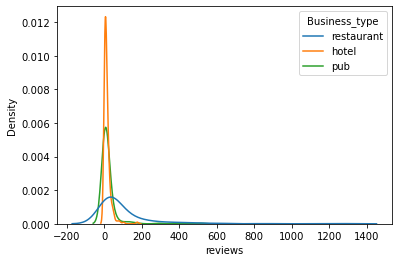

In [168]:

sns.kdeplot(x = master_df.reviews, hue = master_df.Business_type)

In [227]:
grp_master_df = master_df.groupby('Business_type')["reviews", 'rating'].agg(["median"]).applymap(lambda x: np.round(x, 2))
grp_master_df

<ipython-input-227-497a1553b80c>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,reviews,rating
,median,median
Business_type,,
hotel,9.0,4.0
pub,7.0,4.0
restaurant,42.0,4.5


In [226]:
# 1. How does the number of reviews compare between Restaurant, Hotel and Pub (median)
px.bar(grp_master_df['reviews'], x = 

,median
Business_type,
hotel,9.0
pub,7.0
restaurant,42.0


In [ ]:
# 2. What about the rating

In [ ]:
# 3. What is the average rating given by each reviewer

In [194]:
# 4. most requent of price ranges for each business (in percentage)
master_df.groupby('Business_type')['price_range'].value_counts()


Business_type  price_range
hotel          [12 - 33]      89
               [34 - 66]      59
               over 67        13
               under 11       13
pub            [12 - 33]      91
               under 11       62
               [34 - 66]      12
restaurant     [12 - 33]      97
               under 11       44
               [34 - 66]      27
               over 67         8
Name: price_range, dtype: int64

In [198]:
master_df.groupby('Business_type')['price_range'].value_counts().groupby('Business_type').sum()

Business_type
hotel         174
pub           165
restaurant    176
Name: price_range, dtype: int64

In [228]:
px.scatter(data_frame=master_df[master_df.Business_type == 'hotel'], x = 'nb_photos', y = 'reviews', color='rating', hover_name= 'name')